## NAME - Richa
### DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE
## TASK 1
### PROJECT NAME - IRIS FLOWER CLASSIFICATION

#### Problem Statement

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\RICHA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading The Dataset

In [2]:
df = pd.read_csv(r'C:\Users\RICHA\Downloads\archive (7)\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Renaming the columns name
df= df.rename(columns={'SepalLengthCm':'Sepal_Length',
                           'SepalWidthCm':'Sepal_Width',
                           'PetalLengthCm':'Petal_Length',
                           'PetalWidthCm':'Petal_Width'})
df.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# to display stats about data
df.describe()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Preprocessing the dataset

In [6]:
# dropping a column
df = df.drop(columns = ['Id'])
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# checking for null values
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [8]:
# checking no. of samples in each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Exploratory Data Analysis

#### Histogram

<AxesSubplot:>

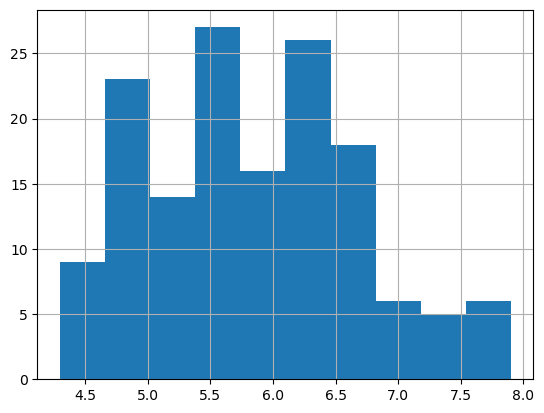

In [9]:
df['Sepal_Length'].hist()

<AxesSubplot:>

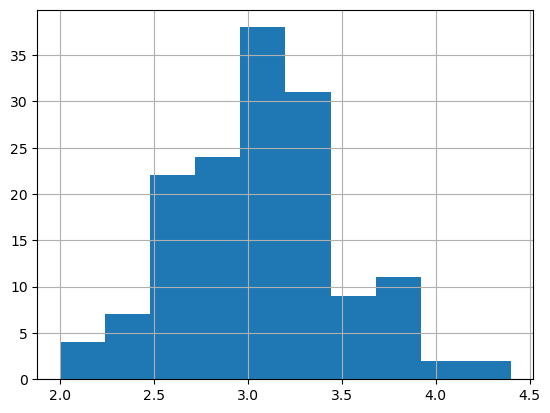

In [10]:
df['Sepal_Width'].hist()

<AxesSubplot:>

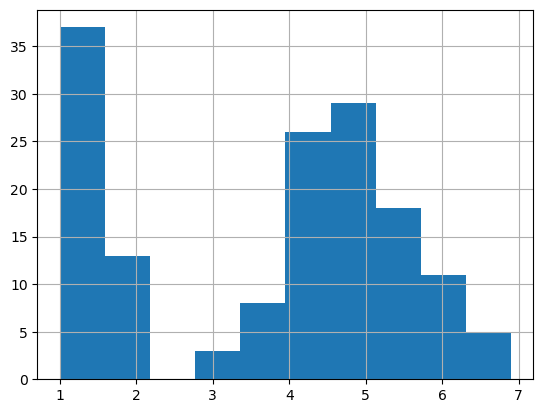

In [11]:
df['Petal_Length'].hist()

<AxesSubplot:>

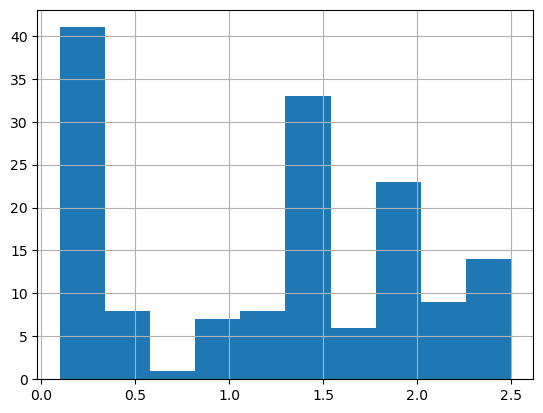

In [12]:
df['Petal_Width'].hist()

#### scatterplot

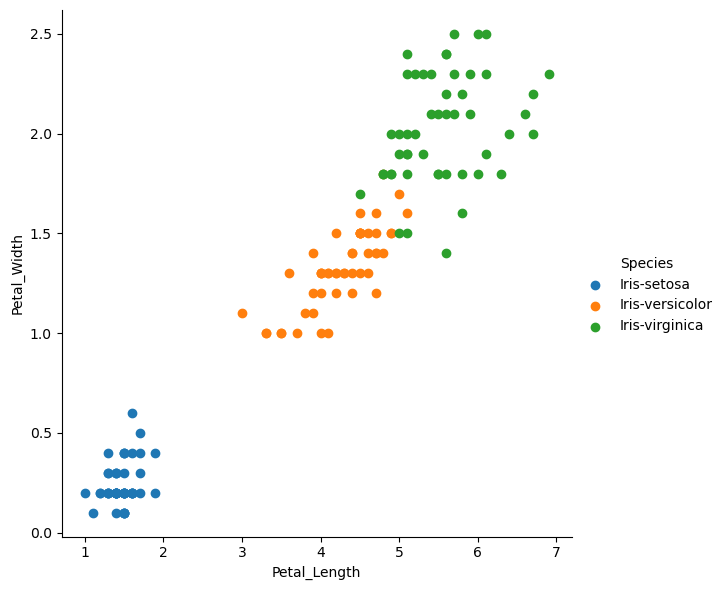

In [13]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter,"Petal_Length","Petal_Width").add_legend()

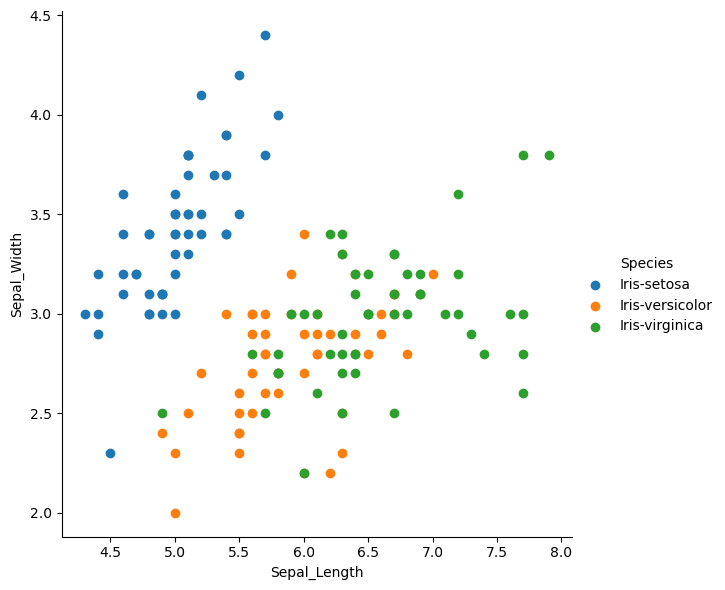

In [14]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter,"Sepal_Length","Sepal_Width").add_legend()

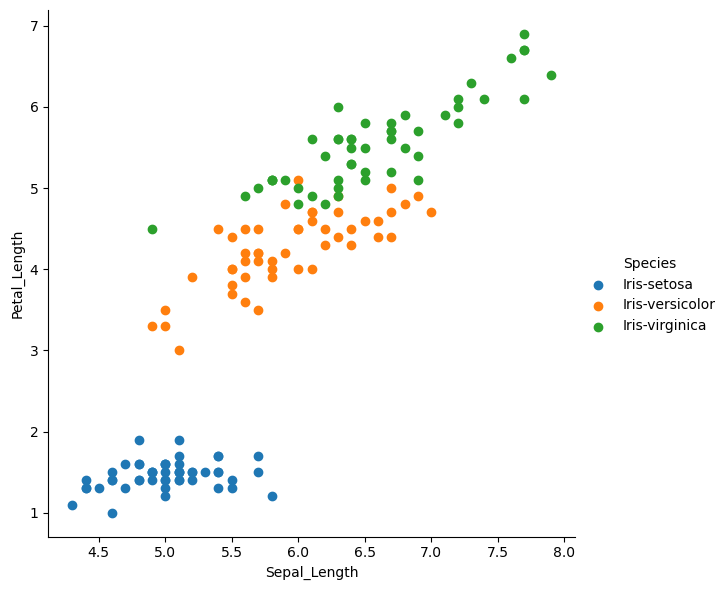

In [15]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter,"Sepal_Length","Petal_Length").add_legend()

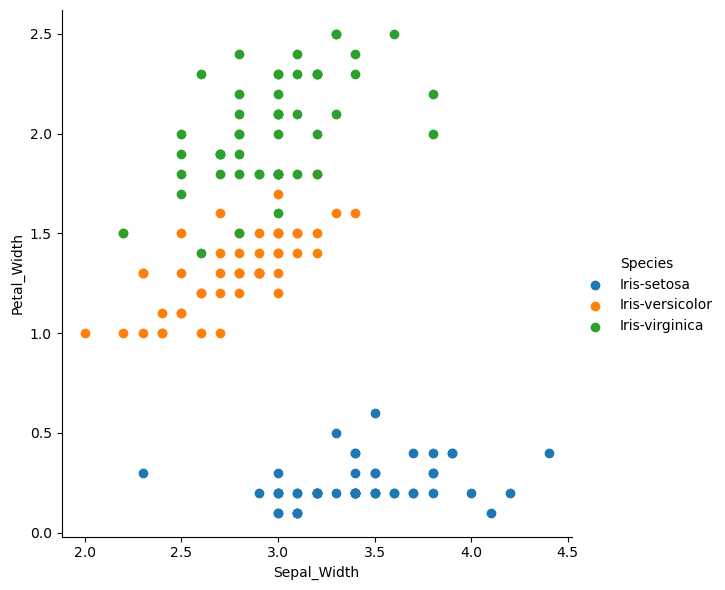

In [16]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter,"Sepal_Width","Petal_Width").add_legend()

#### Coorelation Matrix

In [17]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

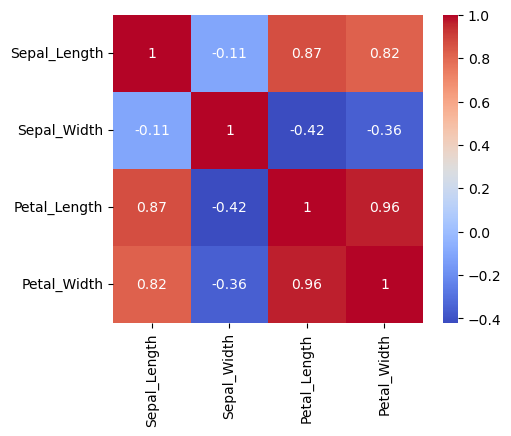

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

### Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Training The Model 

In [21]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
print(x_train.shape)
print(x_train)

(105, 4)
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
92            5.8          2.6           4.0          1.2
93            5.0          2.3           3.3          1.0
45            4.8          3.0           1.4          0.3
20            5.4          3.4           1.7          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
97            6.2          2.9           4.3          1.3
105           7.6          3.0           6.6          2.1
52            6.9          3.1           4.9          1.5
19            5.1          3.8           1.5          0.3
99            5.7          2.8           4.1          1.3

[105 rows x 4 columns]


In [23]:
print(y_test.shape)
print(y_test)

(45,)
57     1
112    2
118    2
14     0
96     1
7      0
49     0
33     0
126    2
89     1
117    2
106    2
140    2
15     0
76     1
10     0
101    2
114    2
2      0
26     0
37     0
39     0
87     1
149    2
36     0
135    2
129    2
35     0
86     1
143    2
125    2
68     1
88     1
142    2
144    2
120    2
43     0
127    2
30     0
132    2
70     1
77     1
111    2
79     1
136    2
Name: Species, dtype: int32


In [24]:
print(x_test.shape)
print(x_test)

(45, 4)
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
57            4.9          2.4           3.3          1.0
112           6.8          3.0           5.5          2.1
118           7.7          2.6           6.9          2.3
14            5.8          4.0           1.2          0.2
96            5.7          2.9           4.2          1.3
7             5.0          3.4           1.5          0.2
49            5.0          3.3           1.4          0.2
33            5.5          4.2           1.4          0.2
126           6.2          2.8           4.8          1.8
89            5.5          2.5           4.0          1.3
117           7.7          3.8           6.7          2.2
106           4.9          2.5           4.5          1.7
140           6.7          3.1           5.6          2.4
15            5.7          4.4           1.5          0.4
76            6.8          2.8           4.8          1.4
10            5.4          3.7           1.5          0.2
101   

In [25]:
print(y_train.shape)
print(y_train)

(105,)
92     1
93     1
45     0
20     0
42     0
      ..
97     1
105    2
52     1
19     0
99     1
Name: Species, Length: 105, dtype: int32


#### logistic regression 

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
# model training
model.fit(x_train, y_train)

C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


#### knn - k-nearest neighbours

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [30]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


#### decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [33]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


#### support vector machine algorithm

In [35]:
from sklearn.svm import SVC

model_svc=SVC()
model_svc.fit(x_train,y_train)

SVC()

In [36]:
prediction1 = model_svc.predict(x_test)

#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1))

0.9111111111111111


### New data for prediction

In [37]:
# New data for prediction
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])

# Predicting the sizes of the iris flowers
predicted_sizes = model.predict(X_new)

# Output the predicted sizes
print(predicted_sizes)


[0 1 1]


C:\Users\RICHA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
